In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling as pp
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
missing_value= ['n/a','na','--', '-', ' ', '']
data=pd.read_csv("Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv",low_memory=False,
                 parse_dates=["Start Date","End Date","Data As Of"],na_values = missing_value)
data.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2021-06-09,2020-01-01,2021-06-05,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,412.0,429.0,NaN
1,2021-06-09,2020-01-01,2021-06-05,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1896.0,1944.0,NaN
2,2021-06-09,2020-01-01,2021-06-05,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,5025.0,5156.0,NaN
3,2021-06-09,2020-01-01,2021-06-05,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,14899.0,15329.0,NaN
4,2021-06-09,2020-01-01,2021-06-05,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,37847.0,38876.0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260820 entries, 0 to 260819
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Data As Of          260820 non-null  datetime64[ns]
 1   Start Date          260820 non-null  datetime64[ns]
 2   End Date            260820 non-null  datetime64[ns]
 3   Group               260820 non-null  object        
 4   Year                248400 non-null  float64       
 5   Month               223560 non-null  float64       
 6   State               260820 non-null  object        
 7   Condition Group     260820 non-null  object        
 8   Condition           260820 non-null  object        
 9   ICD10_codes         260820 non-null  object        
 10  Age Group           260820 non-null  object        
 11  COVID-19 Deaths     194916 non-null  float64       
 12  Number of Mentions  196827 non-null  float64       
 13  Flag                65904 non

In [5]:
data.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,248400.000000,223560.000000,194916.000000,196827.000000
mean,2020.350000,5.500000,135.201379,143.868367
std,0.476971,3.304045,2498.068042,2644.858099
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2020.000000,5.000000,0.000000,0.000000
75%,2021.000000,8.000000,20.000000,21.000000
max,2021.000000,12.000000,586251.000000,586251.000000


In [6]:
data.isnull().sum()

Data As Of                 0
Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  37260
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths        65904
Number of Mentions     63993
Flag                  194916
dtype: int64

In [7]:
data.drop(["Flag"],inplace = True, axis = 1)

Flag is dropped as it has too many missing values.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260820 entries, 0 to 260819
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Data As Of          260820 non-null  datetime64[ns]
 1   Start Date          260820 non-null  datetime64[ns]
 2   End Date            260820 non-null  datetime64[ns]
 3   Group               260820 non-null  object        
 4   Year                248400 non-null  float64       
 5   Month               223560 non-null  float64       
 6   State               260820 non-null  object        
 7   Condition Group     260820 non-null  object        
 8   Condition           260820 non-null  object        
 9   ICD10_codes         260820 non-null  object        
 10  Age Group           260820 non-null  object        
 11  COVID-19 Deaths     194916 non-null  float64       
 12  Number of Mentions  196827 non-null  float64       
dtypes: datetime64[ns](3), float64

In [9]:
data.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,2021-06-09,2020-01-01,2021-06-05,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,412.0,429.0
1,2021-06-09,2020-01-01,2021-06-05,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,1896.0,1944.0
2,2021-06-09,2020-01-01,2021-06-05,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,5025.0,5156.0
3,2021-06-09,2020-01-01,2021-06-05,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,14899.0,15329.0
4,2021-06-09,2020-01-01,2021-06-05,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,37847.0,38876.0


In [10]:
data.isnull().sum()

Data As Of                0
Start Date                0
End Date                  0
Group                     0
Year                  12420
Month                 37260
State                     0
Condition Group           0
Condition                 0
ICD10_codes               0
Age Group                 0
COVID-19 Deaths       65904
Number of Mentions    63993
dtype: int64

In [12]:
data.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,248400.000000,223560.000000,194916.000000,196827.000000
mean,2020.350000,5.500000,135.201379,143.868367
std,0.476971,3.304045,2498.068042,2644.858099
min,2020.000000,1.000000,0.000000,0.000000
25%,2020.000000,3.000000,0.000000,0.000000
50%,2020.000000,5.000000,0.000000,0.000000
75%,2021.000000,8.000000,20.000000,21.000000
max,2021.000000,12.000000,586251.000000,586251.000000


## VISUALIZATION AND ANALYSIS

### AGE

In [13]:
data["Age Group"].value_counts()

45-54         26082
35-44         26082
55-64         26082
85+           26082
0-24          26082
25-34         26082
65-74         26082
75-84         26082
Not stated    26082
All Ages      26082
Name: Age Group, dtype: int64

In [14]:
data.drop(data.index[(data["Age Group"]== "All Ages")],axis = 0, inplace= True )
data.drop(data.index[(data["Age Group"]== "Not stated")],axis = 0, inplace= True )


In [15]:
data["Age Group"].value_counts()

45-54    26082
35-44    26082
55-64    26082
85+      26082
0-24     26082
25-34    26082
65-74    26082
75-84    26082
Name: Age Group, dtype: int64

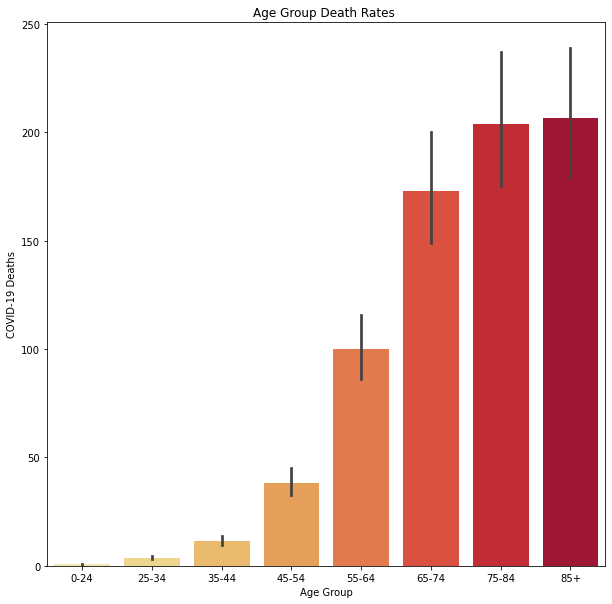

In [14]:
analysis = data.copy()
fig_dim = (10,10)
fig, ax = plt.subplots(figsize = fig_dim ) 
ax.set_title("Age Group Death Rates ")
sns.barplot(x="Age Group", y="COVID-19 Deaths", data=analysis,ax = ax, palette = "YlOrRd")

The number of deaths increase with increase in age.

### Conditions leading to death

In [16]:
data["Condition"].value_counts()

Influenza and pneumonia                                                      9072
Adult respiratory distress syndrome                                          9072
Ischemic heart disease                                                       9072
Cerebrovascular diseases                                                     9072
Renal failure                                                                9072
Respiratory arrest                                                           9072
Sepsis                                                                       9072
Malignant neoplasms                                                          9072
Cardiac arrest                                                               9072
COVID-19                                                                     9072
Hypertensive diseases                                                        9072
Diabetes                                                                     9072
Other diseases o

Text(0.5, 1.0, 'Condition Death Rates ')

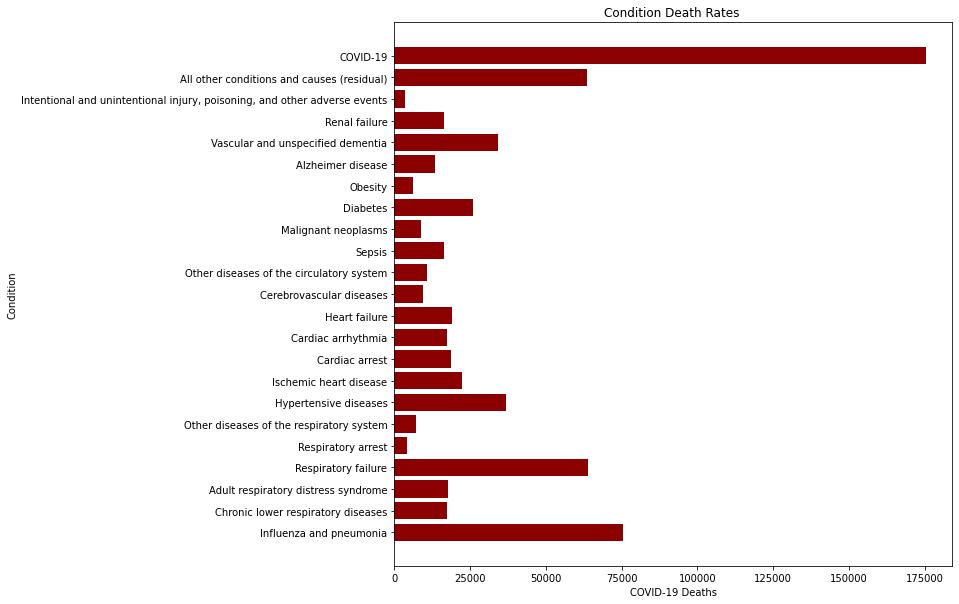

In [18]:
fig_dim = (10,10)
fig, ax = plt.subplots(figsize = fig_dim )
ax.barh(data["Condition"], data["COVID-19 Deaths"], align='center',color = "darkred")
ax.set_xlabel('COVID-19 Deaths') 
ax.set_ylabel('Condition')  
ax.set_title("Condition Death Rates ")



Most deaths occurred due to COVID-19 related complications. Influenza, pneumonia and respiratory failure also led to high 
death rates OF COVID-19 patients.

#### Condition Group

Text(0.5, 1.0, 'Conditions Groups Death Rates ')

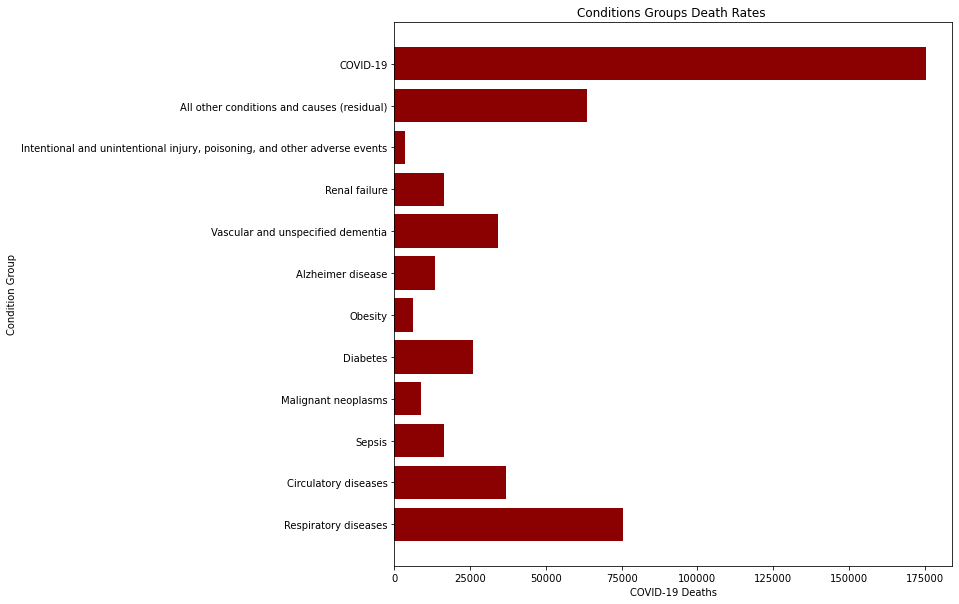

In [28]:
fig_dim = (10,10)
fig, ax = plt.subplots(figsize = fig_dim )
ax.barh(data["Condition Group"], data["COVID-19 Deaths"], align='center', color = "darkred")
ax.set_xlabel('COVID-19 Deaths') 
ax.set_ylabel('Condition Group') 
ax.set_title("Conditions Groups Death Rates ")

Most deaths occured due to COVID-19 related complications. Respiratory and circulatory diseases led to a significant number of deaths

### State

In [17]:
data["State"].value_counts()

Indiana                 3864
New Hampshire           3864
Utah                    3864
Tennessee               3864
New Jersey              3864
North Dakota            3864
Florida                 3864
Nebraska                3864
Arizona                 3864
Wisconsin               3864
Vermont                 3864
Ohio                    3864
District of Columbia    3864
North Carolina          3864
Missouri                3864
Kansas                  3864
West Virginia           3864
Pennsylvania            3864
Arkansas                3864
Alabama                 3864
New Mexico              3864
Montana                 3864
Oklahoma                3864
Minnesota               3864
United States           3864
Louisiana               3864
Puerto Rico             3864
Colorado                3864
California              3864
Nevada                  3864
South Dakota            3864
Alaska                  3864
Virginia                3864
Georgia                 3864
New York      

In [18]:
data.drop(data.index[(data["State"]== "United States")],axis = 0, inplace= True )
data["State"].value_counts()

Indiana                 3864
Colorado                3864
Utah                    3864
Tennessee               3864
New Jersey              3864
North Dakota            3864
Florida                 3864
Nebraska                3864
Arizona                 3864
Wisconsin               3864
Vermont                 3864
Ohio                    3864
District of Columbia    3864
New Hampshire           3864
North Carolina          3864
Kansas                  3864
West Virginia           3864
Pennsylvania            3864
Arkansas                3864
Alabama                 3864
New Mexico              3864
Montana                 3864
Oklahoma                3864
Minnesota               3864
Louisiana               3864
Puerto Rico             3864
California              3864
Missouri                3864
Nevada                  3864
South Dakota            3864
Alaska                  3864
Virginia                3864
Georgia                 3864
New York                3864
Delaware      

Text(0.5, 1.0, 'State Death Rates ')

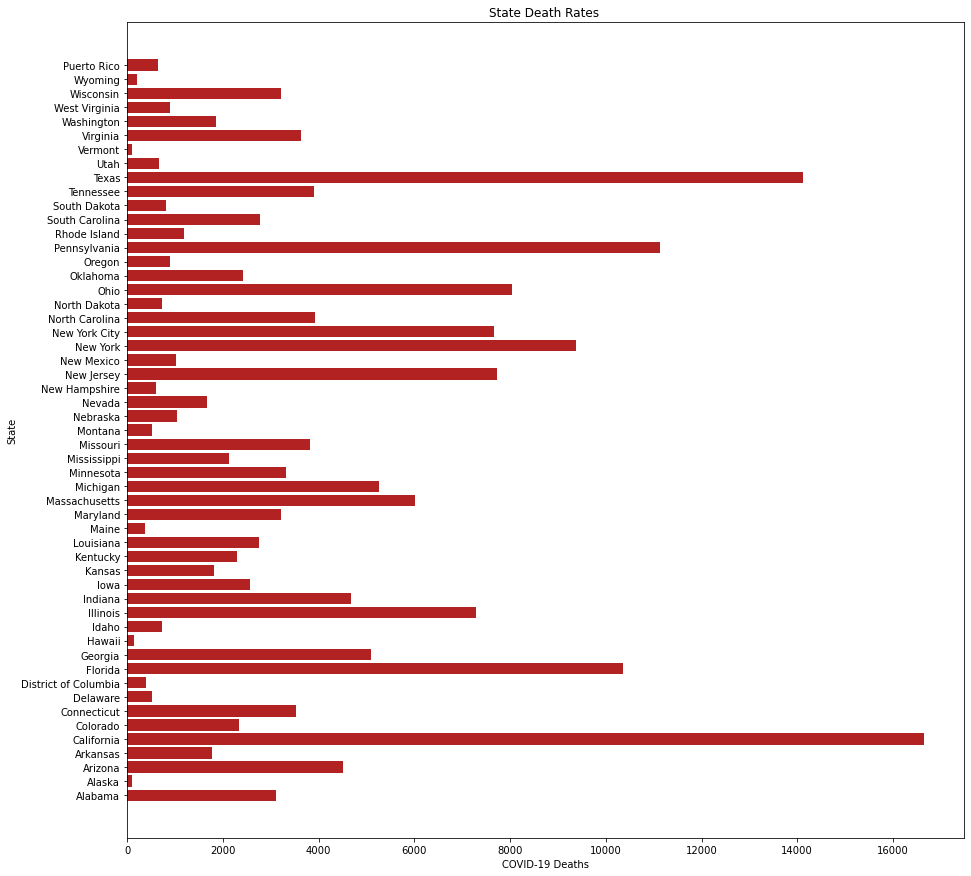

In [31]:
dims = (15,15)
fig, ax = plt.subplots(figsize=dims)
ax.barh(data["State"], data["COVID-19 Deaths"], align='center', color = "firebrick")
ax.set_xlabel('COVID-19 Deaths')  
ax.set_ylabel('State')  
ax.set_title("State Death Rates ")

Carlifornia had the highest amount of deaths, followed by Texas and Pennsylvania

### Monthly Deaths

In [19]:
for content in ["Year","Month"]:
    data[content] = data[content].astype("Int32")

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204792 entries, 230 to 260783
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Data As Of          204792 non-null  datetime64[ns]
 1   Start Date          204792 non-null  datetime64[ns]
 2   End Date            204792 non-null  datetime64[ns]
 3   Group               204792 non-null  object        
 4   Year                195040 non-null  Int32         
 5   Month               175536 non-null  Int32         
 6   State               204792 non-null  object        
 7   Condition Group     204792 non-null  object        
 8   Condition           204792 non-null  object        
 9   ICD10_codes         204792 non-null  object        
 10  Age Group           204792 non-null  object        
 11  COVID-19 Deaths     144108 non-null  float64       
 12  Number of Mentions  145770 non-null  float64       
dtypes: Int32(2), datetime64[ns]

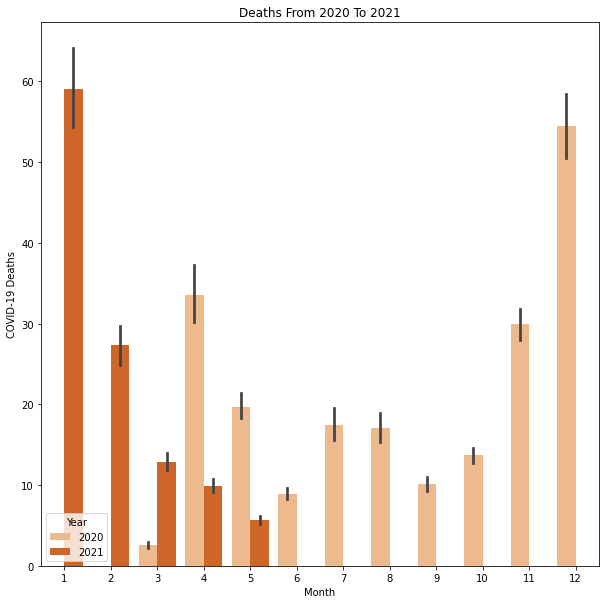

In [36]:
fig_dim = (10,10)
fig, ax = plt.subplots(figsize = fig_dim )
ax.set_title("Deaths From 2020 To 2021")
sns.barplot(x="Month", y="COVID-19 Deaths", hue = "Year", data=data,ax = ax, palette = "Oranges")

The death rate has a pattern of increase, followed by subsequent decrease is repetitive. This was probably brought about
by increasing interaction restrictions during surges, the relaxing them after numbers reducing. Ultimately leading to
another surge.

### Number of Mentions 

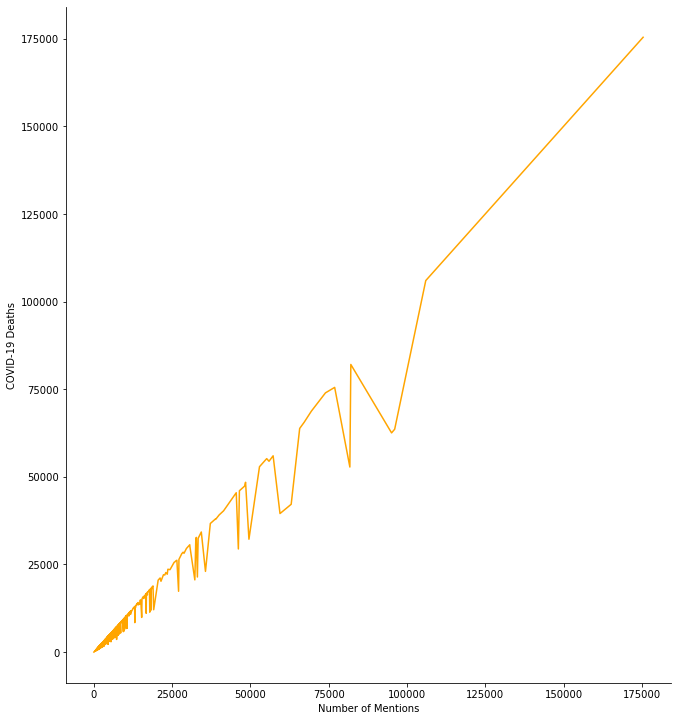

In [38]:
rel = sns.relplot(x="Number of Mentions", y="COVID-19 Deaths",
             kind="line", data=analysis, color = "Orange")
rel.fig.set_size_inches(11,11)

Both have a linear relationship, however, outliers distort the graph's trajectory.

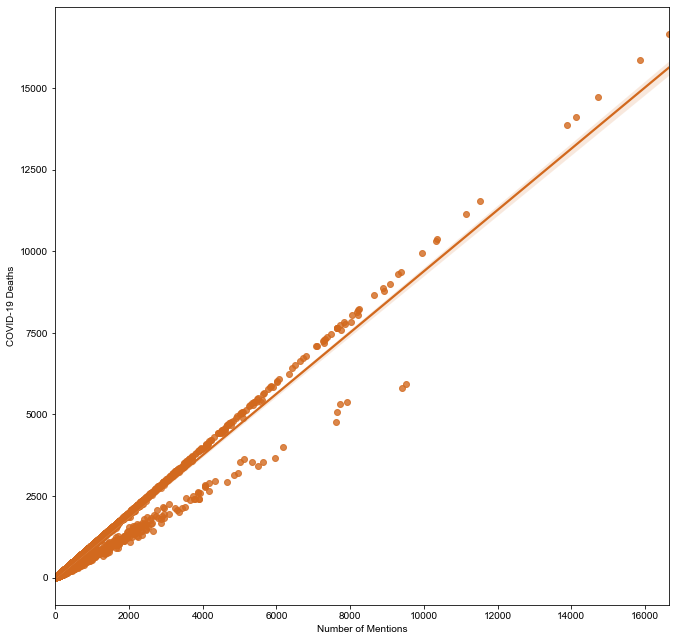

In [39]:
fig_dim = (11,11)
fig, ax = plt.subplots(figsize = fig_dim ) 
sns.set(color_codes=True)
ax = sns.regplot(x="Number of Mentions", y="COVID-19 Deaths", data=data, color = "chocolate")

In [40]:
pp.ProfileReport(data, title = "COVID-19 Death Rate Data Profile Report")

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## DATA PREPERATION

In [21]:
data2 = data.copy()

### Dates

In [22]:
time =[var for var in data2.columns if data2[var].dtype=='datetime64[ns]']
time

['Data As Of', 'Start Date', 'End Date']

In [23]:
data2.sort_values(by=["Start Date"], inplace=True, ascending=True)
data2.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
230,2021-06-09,2020-01-01,2021-06-05,By Total,<NA>,<NA>,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN
31100,2021-06-09,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Malignant neoplasms,Malignant neoplasms,C00-C97,0-24,NaN,NaN
31094,2021-06-09,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,85+,317.0,317.0
31092,2021-06-09,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,75-84,390.0,390.0
31090,2021-06-09,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,65-74,398.0,398.0


In [24]:
data2["Data As Of"].unique()

array(['2021-06-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [25]:
data2.drop("Data As Of", inplace = True, axis=1)
data2.head()

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
230,2020-01-01,2021-06-05,By Total,<NA>,<NA>,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN
31100,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Malignant neoplasms,Malignant neoplasms,C00-C97,0-24,NaN,NaN
31094,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,85+,317.0,317.0
31092,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,75-84,390.0,390.0
31090,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,65-74,398.0,398.0


In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204792 entries, 230 to 260783
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Start Date          204792 non-null  datetime64[ns]
 1   End Date            204792 non-null  datetime64[ns]
 2   Group               204792 non-null  object        
 3   Year                195040 non-null  Int32         
 4   Month               175536 non-null  Int32         
 5   State               204792 non-null  object        
 6   Condition Group     204792 non-null  object        
 7   Condition           204792 non-null  object        
 8   ICD10_codes         204792 non-null  object        
 9   Age Group           204792 non-null  object        
 10  COVID-19 Deaths     144108 non-null  float64       
 11  Number of Mentions  145770 non-null  float64       
dtypes: Int32(2), datetime64[ns](2), float64(2), object(6)
memory usage: 19.1+ MB


In [27]:
data2["Time Difference"] = (data2["End Date"] - data2["Start Date"])/ np.timedelta64(1, 'D')
data2.head()

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Time Difference
230,2020-01-01,2021-06-05,By Total,<NA>,<NA>,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,521.0
31100,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Malignant neoplasms,Malignant neoplasms,C00-C97,0-24,NaN,NaN,365.0
31094,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,85+,317.0,317.0,365.0
31092,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,75-84,390.0,390.0,365.0
31090,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,65-74,398.0,398.0,365.0


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204792 entries, 230 to 260783
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Start Date          204792 non-null  datetime64[ns]
 1   End Date            204792 non-null  datetime64[ns]
 2   Group               204792 non-null  object        
 3   Year                195040 non-null  Int32         
 4   Month               175536 non-null  Int32         
 5   State               204792 non-null  object        
 6   Condition Group     204792 non-null  object        
 7   Condition           204792 non-null  object        
 8   ICD10_codes         204792 non-null  object        
 9   Age Group           204792 non-null  object        
 10  COVID-19 Deaths     144108 non-null  float64       
 11  Number of Mentions  145770 non-null  float64       
 12  Time Difference     204792 non-null  float64       
dtypes: Int32(2), datetime64[ns]

In [29]:
data2["Start Year"] = data2["Start Date"].dt.year
data2["Start Month"] = data2["Start Date"].dt.month
data2["Start Day"] = data2["Start Date"].dt.day

data2["End Year"] = data2["End Date"].dt.year
data2["End Month"] = data2["End Date"].dt.month
data2["End Day"] = data2["End Date"].dt.day

data2.head()

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Time Difference,Start Year,Start Month,Start Day,End Year,End Month,End Day
230,2020-01-01,2021-06-05,By Total,<NA>,<NA>,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,521.0,2020,1,1,2021,6,5
31100,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Malignant neoplasms,Malignant neoplasms,C00-C97,0-24,NaN,NaN,365.0,2020,1,1,2020,12,31
31094,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,85+,317.0,317.0,365.0,2020,1,1,2020,12,31
31092,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,75-84,390.0,390.0,365.0,2020,1,1,2020,12,31
31090,2020-01-01,2020-12-31,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,65-74,398.0,398.0,365.0,2020,1,1,2020,12,31


In [30]:
data2.drop(["Start Date", "End Date"], inplace = True, axis=1)
data2.head()

,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Time Difference,Start Year,Start Month,Start Day,End Year,End Month,End Day
230,By Total,<NA>,<NA>,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,521.0,2020,1,1,2021,6,5
31100,By Year,2020,<NA>,Pennsylvania,Malignant neoplasms,Malignant neoplasms,C00-C97,0-24,NaN,NaN,365.0,2020,1,1,2020,12,31
31094,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,85+,317.0,317.0,365.0,2020,1,1,2020,12,31
31092,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,75-84,390.0,390.0,365.0,2020,1,1,2020,12,31
31090,By Year,2020,<NA>,Pennsylvania,Sepsis,Sepsis,A40-A41,65-74,398.0,398.0,365.0,2020,1,1,2020,12,31


In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204792 entries, 230 to 260783
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Group               204792 non-null  object 
 1   Year                195040 non-null  Int32  
 2   Month               175536 non-null  Int32  
 3   State               204792 non-null  object 
 4   Condition Group     204792 non-null  object 
 5   Condition           204792 non-null  object 
 6   ICD10_codes         204792 non-null  object 
 7   Age Group           204792 non-null  object 
 8   COVID-19 Deaths     144108 non-null  float64
 9   Number of Mentions  145770 non-null  float64
 10  Time Difference     204792 non-null  float64
 11  Start Year          204792 non-null  int64  
 12  Start Month         204792 non-null  int64  
 13  Start Day           204792 non-null  int64  
 14  End Year            204792 non-null  int64  
 15  End Month           204792 non-n

In [32]:
data2.drop(["Year","Month"],inplace = True, axis=1)

In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204792 entries, 230 to 260783
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Group               204792 non-null  object 
 1   State               204792 non-null  object 
 2   Condition Group     204792 non-null  object 
 3   Condition           204792 non-null  object 
 4   ICD10_codes         204792 non-null  object 
 5   Age Group           204792 non-null  object 
 6   COVID-19 Deaths     144108 non-null  float64
 7   Number of Mentions  145770 non-null  float64
 8   Time Difference     204792 non-null  float64
 9   Start Year          204792 non-null  int64  
 10  Start Month         204792 non-null  int64  
 11  Start Day           204792 non-null  int64  
 12  End Year            204792 non-null  int64  
 13  End Month           204792 non-null  int64  
 14  End Day             204792 non-null  int64  
dtypes: float64(3), int64(6), object(

### Categorical

In [34]:
categorical = [var for var in data2.columns if data2[var].dtype=='O']
categorical 

['Group', 'State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group']

### Numerical

In [35]:
numerical = [var for var in data2.columns if data2[var].dtype == 'float64']
numerical

['COVID-19 Deaths', 'Number of Mentions', 'Time Difference']

#### Continuous

In [36]:
numerical

['COVID-19 Deaths', 'Number of Mentions', 'Time Difference']

In [37]:
data2["ICD10_codes"].value_counts()

G30                                                                                                                                                                                     8904
E10-E14                                                                                                                                                                                 8904
I50                                                                                                                                                                                     8904
I20-I25                                                                                                                                                                                 8904
J09-J18                                                                                                                                                                                 8904
U071                                                   

Some rows in ICD10_codes column contain a list of values, therefore, they need to be plit to allow for accurate encoding.

In [38]:
'''def list_conv(var):
    list_ = list(var.split(","))
    return list_'''

'def list_conv(var):\n    list_ = list(var.split(","))\n    return list_'

In [40]:
data3 = data2.copy()

In [41]:
data3 = data3.assign(ICD10_codes= data3.ICD10_codes.str.split(","))

In [42]:
data3.head()

,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Time Difference,Start Year,Start Month,Start Day,End Year,End Month,End Day
230,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,[J09-J18],0-24,NaN,NaN,521.0,2020,1,1,2021,6,5
31100,By Year,Pennsylvania,Malignant neoplasms,Malignant neoplasms,[C00-C97],0-24,NaN,NaN,365.0,2020,1,1,2020,12,31
31094,By Year,Pennsylvania,Sepsis,Sepsis,[A40-A41],85+,317.0,317.0,365.0,2020,1,1,2020,12,31
31092,By Year,Pennsylvania,Sepsis,Sepsis,[A40-A41],75-84,390.0,390.0,365.0,2020,1,1,2020,12,31
31090,By Year,Pennsylvania,Sepsis,Sepsis,[A40-A41],65-74,398.0,398.0,365.0,2020,1,1,2020,12,31


In [44]:
def one_d(var):
    return pd.Series([x for list_ in var for x in list_])

In [45]:
one_d(data3["ICD10_codes"]).value_counts()

G30         8904
 I45        8904
 F04-G26    8904
 N00-N16    8904
 J81-J86    8904
            ... 
I50         8904
 E15-E64    8904
C00-C97     8904
 K00-K93    8904
 N20-N98    8904
Length: 63, dtype: int64

In [46]:
data2.head()

,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Time Difference,Start Year,Start Month,Start Day,End Year,End Month,End Day
230,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,521.0,2020,1,1,2021,6,5
31100,By Year,Pennsylvania,Malignant neoplasms,Malignant neoplasms,C00-C97,0-24,NaN,NaN,365.0,2020,1,1,2020,12,31
31094,By Year,Pennsylvania,Sepsis,Sepsis,A40-A41,85+,317.0,317.0,365.0,2020,1,1,2020,12,31
31092,By Year,Pennsylvania,Sepsis,Sepsis,A40-A41,75-84,390.0,390.0,365.0,2020,1,1,2020,12,31
31090,By Year,Pennsylvania,Sepsis,Sepsis,A40-A41,65-74,398.0,398.0,365.0,2020,1,1,2020,12,31


In [47]:
data2 = data2.assign(ICD10_codes= data2.ICD10_codes.str.split(","))

In [48]:
data2.head()

,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Time Difference,Start Year,Start Month,Start Day,End Year,End Month,End Day
230,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,[J09-J18],0-24,NaN,NaN,521.0,2020,1,1,2021,6,5
31100,By Year,Pennsylvania,Malignant neoplasms,Malignant neoplasms,[C00-C97],0-24,NaN,NaN,365.0,2020,1,1,2020,12,31
31094,By Year,Pennsylvania,Sepsis,Sepsis,[A40-A41],85+,317.0,317.0,365.0,2020,1,1,2020,12,31
31092,By Year,Pennsylvania,Sepsis,Sepsis,[A40-A41],75-84,390.0,390.0,365.0,2020,1,1,2020,12,31
31090,By Year,Pennsylvania,Sepsis,Sepsis,[A40-A41],65-74,398.0,398.0,365.0,2020,1,1,2020,12,31


In [49]:
data2 = data2.explode("ICD10_codes")

In [50]:
data2["ICD10_codes"].value_counts()

G30         8904
 I45        8904
 F04-G26    8904
 N00-N16    8904
 J81-J86    8904
            ... 
I50         8904
 E15-E64    8904
C00-C97     8904
 K00-K93    8904
 N20-N98    8904
Name: ICD10_codes, Length: 63, dtype: int64

In [48]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560952 entries, 230 to 260783
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Group               560952 non-null  object 
 1   State               560952 non-null  object 
 2   Condition Group     560952 non-null  object 
 3   Condition           560952 non-null  object 
 4   ICD10_codes         560952 non-null  object 
 5   Age Group           560952 non-null  object 
 6   COVID-19 Deaths     388347 non-null  float64
 7   Number of Mentions  405351 non-null  float64
 8   Time Difference     560952 non-null  float64
 9   Start Year          560952 non-null  int64  
 10  Start Month         560952 non-null  int64  
 11  Start Day           560952 non-null  int64  
 12  End Year            560952 non-null  int64  
 13  End Month           560952 non-null  int64  
 14  End Day             560952 non-null  int64  
dtypes: float64(3), int64(6), object(

In [49]:
for label, content in data2.items():
    if pd.api.types.is_string_dtype(content):
        data2[label] = content.astype("category").cat.as_ordered()

In [51]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560952 entries, 230 to 260783
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Group               560952 non-null  object 
 1   State               560952 non-null  object 
 2   Condition Group     560952 non-null  object 
 3   Condition           560952 non-null  object 
 4   ICD10_codes         560952 non-null  object 
 5   Age Group           560952 non-null  object 
 6   COVID-19 Deaths     388347 non-null  float64
 7   Number of Mentions  405351 non-null  float64
 8   Time Difference     560952 non-null  float64
 9   Start Year          560952 non-null  int64  
 10  Start Month         560952 non-null  int64  
 11  Start Day           560952 non-null  int64  
 12  End Year            560952 non-null  int64  
 13  End Month           560952 non-null  int64  
 14  End Day             560952 non-null  int64  
dtypes: float64(3), int64(6), object(

### OUTLIERS

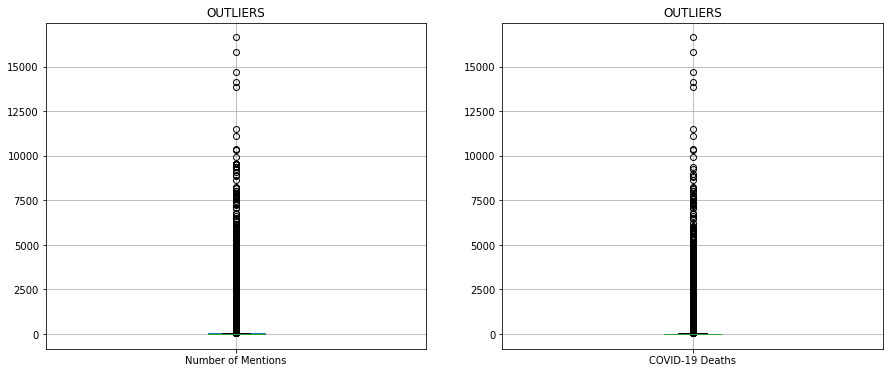

In [56]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data2.boxplot(column="Number of Mentions")
fig.set_title('OUTLIERS')


plt.subplot(1, 2, 2)
fig = data2.boxplot(column="COVID-19 Deaths")
fig.set_title('OUTLIERS')

plt.show()

In [55]:
data2.isnull().sum()

Group                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       172605
Number of Mentions    155601
Time Difference            0
Start Year                 0
Start Month                0
Start Day                  0
End Year                   0
End Month                  0
End Day                    0
dtype: int64

In [56]:
spare= data2.copy()

In [57]:
for label, content in spare.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            spare[label+"_is_missing"] = pd.isnull(content)
            spare[label] = content.fillna(content.mean())

In [58]:
spare.isnull().sum()

Group                            0
State                            0
Condition Group                  0
Condition                        0
ICD10_codes                      0
Age Group                        0
COVID-19 Deaths                  0
Number of Mentions               0
Time Difference                  0
Start Year                       0
Start Month                      0
Start Day                        0
End Year                         0
End Month                        0
End Day                          0
COVID-19 Deaths_is_missing       0
Number of Mentions_is_missing    0
dtype: int64

Convert all categorical columns to numberical.

In [59]:
pd.Categorical(spare['State']).codes+1

array([ 1, 40, 40, ...,  4,  4, 41], dtype=int8)

In [60]:
for var in categorical:
    spare[var] = pd.Categorical(spare[var]).codes+1
spare.head()

,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Time Difference,Start Year,Start Month,Start Day,End Year,End Month,End Day,COVID-19 Deaths_is_missing,Number of Mentions_is_missing
230,2,1,10,12,56,1,56.53137,74.959225,521.0,2020,1,1,2021,6,5,True,True
31100,3,40,7,15,43,1,56.53137,74.959225,365.0,2020,1,1,2020,12,31,True,True
31094,3,40,11,22,42,8,317.00000,317.000000,365.0,2020,1,1,2020,12,31,False,False
31092,3,40,11,22,42,7,390.00000,390.000000,365.0,2020,1,1,2020,12,31,False,False
31090,3,40,11,22,42,6,398.00000,398.000000,365.0,2020,1,1,2020,12,31,False,False


In [61]:
spare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560952 entries, 230 to 260783
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Group                          560952 non-null  int8   
 1   State                          560952 non-null  int8   
 2   Condition Group                560952 non-null  int8   
 3   Condition                      560952 non-null  int8   
 4   ICD10_codes                    560952 non-null  int8   
 5   Age Group                      560952 non-null  int8   
 6   COVID-19 Deaths                560952 non-null  float64
 7   Number of Mentions             560952 non-null  float64
 8   Time Difference                560952 non-null  float64
 9   Start Year                     560952 non-null  int64  
 10  Start Month                    560952 non-null  int64  
 11  Start Day                      560952 non-null  int64  
 12  End Year                    

In [62]:
for var in spare.columns:
    spare[var] = spare[var].astype(float)

In [63]:
spare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560952 entries, 230 to 260783
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Group                          560952 non-null  float64
 1   State                          560952 non-null  float64
 2   Condition Group                560952 non-null  float64
 3   Condition                      560952 non-null  float64
 4   ICD10_codes                    560952 non-null  float64
 5   Age Group                      560952 non-null  float64
 6   COVID-19 Deaths                560952 non-null  float64
 7   Number of Mentions             560952 non-null  float64
 8   Time Difference                560952 non-null  float64
 9   Start Year                     560952 non-null  float64
 10  Start Month                    560952 non-null  float64
 11  Start Day                      560952 non-null  float64
 12  End Year                    

zscore requires values to be in floating point notation.

Text(0.5, 1.0, 'OUTLIERS')

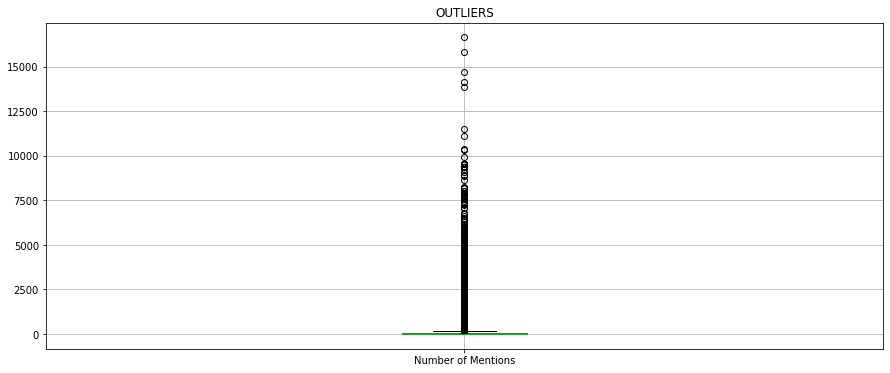

In [72]:
plt.figure(figsize=(15,6))
plt.subplot()
fig = spare.boxplot(column="Number of Mentions")
fig.set_title('OUTLIERS')

#### Zscore

In [64]:
from scipy import stats

z = np.abs(stats.zscore(spare))
z

array([[1.2493901 , 1.69967317, 1.40741444, ..., 2.4364669 , 1.49997248,
        1.61402193],
       [2.88921459, 0.84983659, 0.58894881, ..., 0.48729338, 1.49997248,
        1.61402193],
       [2.88921459, 0.84983659, 1.68023631, ..., 0.48729338, 0.6666789 ,
        0.61957027],
       ...,
       [0.3904344 , 1.50355704, 0.22951682, ..., 2.4364669 , 0.6666789 ,
        0.61957027],
       [0.3904344 , 1.50355704, 0.22951682, ..., 2.4364669 , 0.6666789 ,
        0.61957027],
       [0.3904344 , 0.91520863, 0.50233869, ..., 2.4364669 , 0.6666789 ,
        0.61957027]])

In [65]:
np.where(z > 3)

(array([     0,    115,    115, ..., 451289, 451289, 459313], dtype=int64),
 array([8, 6, 7, ..., 6, 7, 6], dtype=int64))

In [66]:
spare_zscore_clean =spare.copy()
spare_zscore_clean = spare_zscore_clean[(z<3).all(axis=1)]
spare_zscore_clean.shape

(0, 17)

#### IQR

In [68]:
Q1 = spare.quantile(0.25)
Q3 = spare.quantile(0.75)
IQR = Q3 - Q1
IQR

Group                             0.000000
State                            26.000000
Condition Group                   8.000000
Condition                        15.000000
ICD10_codes                      32.000000
Age Group                         3.500000
COVID-19 Deaths                  56.531370
Number of Mentions               74.959225
Time Difference                   1.000000
Start Year                        1.000000
Start Month                       5.000000
Start Day                         0.000000
End Year                          1.000000
End Month                         5.000000
End Day                           2.000000
COVID-19 Deaths_is_missing        1.000000
Number of Mentions_is_missing     1.000000
dtype: float64

In [69]:
spare_iqr = spare.copy()
spare_iqr_clean = spare.copy()
spare_iqr_clean = spare_iqr[~((spare_iqr < (Q1 - 1.5 * IQR)) | (spare_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]

In [70]:
spare_iqr_clean.shape

(389288, 17)

Text(0.5, 1.0, 'OUTLIERS')

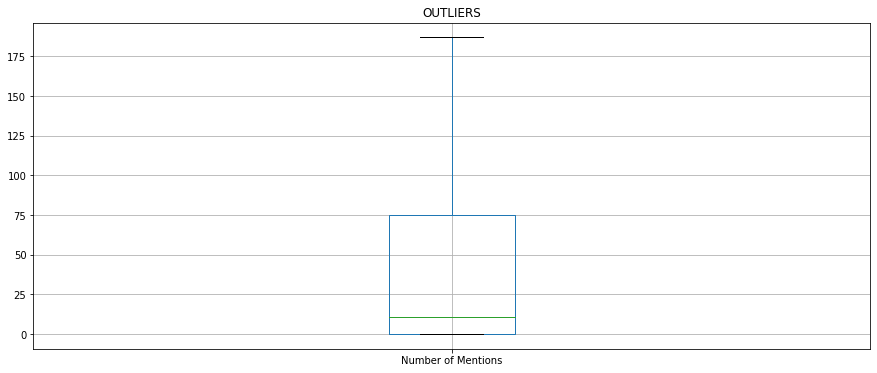

In [79]:
plt.figure(figsize=(15,6))
plt.subplot()
fig = spare_iqr_clean.boxplot(column="Number of Mentions")
fig.set_title('OUTLIERS')

## Test-Train-Split

In [71]:
mdl1 = spare_iqr_clean.copy()
df_test1 = pd.DataFrame()
df_test1 = mdl1[mdl1["End Year"]==2021]
df_test1 = df_test1[df_test1["End Month"]==6]
df_test1.head()

,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Time Difference,Start Year,Start Month,Start Day,End Year,End Month,End Day,COVID-19 Deaths_is_missing,Number of Mentions_is_missing


Target data has been removed as outliers, therefore the original dataset will be used.

In [72]:
mdl = data2.copy()
df_test = pd.DataFrame()


Predict values for the month of June 2021.

In [73]:
df_test = mdl[mdl["End Year"]==2021]
df_test = df_test[df_test["End Month"]==6]
df_test.head()

,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Time Difference,Start Year,Start Month,Start Day,End Year,End Month,End Day
230,By Total,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN,521.0,2020,1,1,2021,6,5
12361,By Total,Puerto Rico,Alzheimer disease,Alzheimer disease,G30,25-34,0.0,0.0,521.0,2020,1,1,2021,6,5
12360,By Total,Puerto Rico,Alzheimer disease,Alzheimer disease,G30,0-24,0.0,0.0,521.0,2020,1,1,2021,6,5
12357,By Total,Puerto Rico,Obesity,Obesity,E65-E68,85+,NaN,NaN,521.0,2020,1,1,2021,6,5
8690,By Total,Ohio,Vascular and unspecified dementia,Vascular and unspecified dementia,F01,0-24,0.0,0.0,521.0,2020,1,1,2021,6,5


In [74]:
df_train = pd.concat([mdl,df_test,df_test]).drop_duplicates(keep = False)
df_train.head()


,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Time Difference,Start Year,Start Month,Start Day,End Year,End Month,End Day
31100,By Year,Pennsylvania,Malignant neoplasms,Malignant neoplasms,C00-C97,0-24,NaN,NaN,365.0,2020,1,1,2020,12,31
31094,By Year,Pennsylvania,Sepsis,Sepsis,A40-A41,85+,317.0,317.0,365.0,2020,1,1,2020,12,31
31092,By Year,Pennsylvania,Sepsis,Sepsis,A40-A41,75-84,390.0,390.0,365.0,2020,1,1,2020,12,31
31090,By Year,Pennsylvania,Sepsis,Sepsis,A40-A41,65-74,398.0,398.0,365.0,2020,1,1,2020,12,31
106614,By Month,Iowa,Alzheimer disease,Alzheimer disease,G30,45-54,0.0,0.0,30.0,2020,1,1,2020,1,31


In [75]:
df_train["End Year"].value_counts()

2020    347256
2021    133560
Name: End Year, dtype: int64

### Split Data

In [76]:
X_train, y_train = df_train.drop("COVID-19 Deaths", axis=1), df_train["COVID-19 Deaths"]
X_test, y_test = df_test.drop("COVID-19 Deaths", axis=1), df_test["COVID-19 Deaths"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((480816, 14), (480816,), (80136, 14), (80136,))

In [77]:
y_train

31100       NaN
31094     317.0
31092     390.0
31090     398.0
106614      0.0
          ...  
206692      NaN
206692      NaN
206692      NaN
206422      NaN
58156       0.0
Name: COVID-19 Deaths, Length: 480816, dtype: float64

## Feature Engineering

### Missing Values

#### Continuous

In [78]:
data2.isnull().sum()

Group                      0
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       172605
Number of Mentions    155601
Time Difference            0
Start Year                 0
Start Month                0
Start Day                  0
End Year                   0
End Month                  0
End Day                    0
dtype: int64

In [79]:
numerical

['COVID-19 Deaths', 'Number of Mentions', 'Time Difference']

In [80]:
for var in [X_train, X_test]:
    if var["Number of Mentions"].isnull().mean()>0:
        print(var["Number of Mentions"].isnull().mean())

0.2938067784765898
0.17887091943695718


In [81]:
for var in [y_train, y_test]:
    if var.isnull().mean()>0:
        print(var.isnull().mean())

0.3247000931749359
0.20570030947389437


In [82]:
X_train_mean = X_train.copy()
X_test_mean = X_test.copy()


X_train_median = X_train.copy()
X_test_median = X_test.copy()



In [83]:
for df in [X_train_mean, X_test_mean]:
    for var in ['Number of Mentions']:
        df[var].fillna(X_train[var].mean(), inplace=True) 


In [84]:
for df in [X_train_median, X_test_median]:
    for var in ['Number of Mentions']:
        df[var].fillna(X_train[var].median(), inplace=True) 

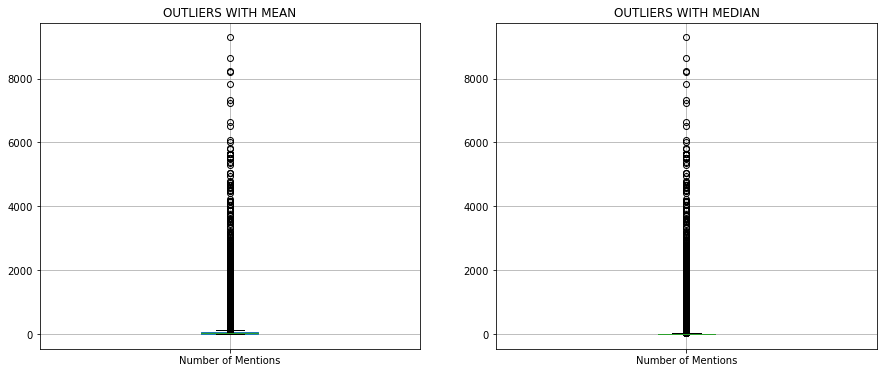

In [85]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = X_train_mean.boxplot(column="Number of Mentions")
fig.set_title('OUTLIERS WITH MEAN')
    
    
plt.subplot(1, 2, 2)
fig = X_train_median.boxplot(column="Number of Mentions")
fig.set_title('OUTLIERS WITH MEDIAN')

plt.show()

Mean seems to be have a better performance than median.

In [86]:
for df in [X_train, X_test]:
    for var in ['Number of Mentions']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
        df[var].fillna(X_train[var].mean(), inplace=True) 

In [87]:
X_train["Number of Mentions"].isnull().mean()

0.0

In [88]:
y_train.isnull().sum()

156121

In [89]:
for x in [y_train,y_test]:
    x.fillna(y_train.mean(), inplace=True)
    #df.fillna(y_train[var].mean(), inplace=True)
    

In [90]:
y_train.isnull().sum()

0

### Cardinality

Text(0, 0.5, 'Number of different categories')

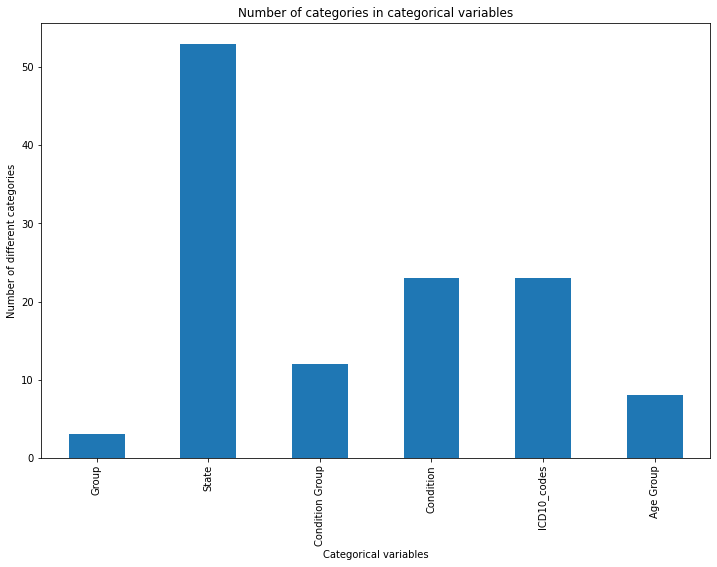

In [103]:
no_unique = []
for var in categorical:
    no_unique.append(len(data[var].unique()))
    
 
bar = pd.Series(no_unique)
bar.index = pd.Series(categorical)
bar.plot.bar(figsize=(12,8))
plt.title('Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories')

In [91]:
categorical

['Group', 'State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group']

In [92]:
data2["Group"].unique()

array(['By Total', 'By Year', 'By Month'], dtype=object)

In [93]:
data2["Age Group"].unique()

array(['0-24', '85+', '75-84', '65-74', '45-54', '55-64', '35-44',
       '25-34'], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [95]:
for var in categorical:
    X_train[var] = labelencoder.fit_transform(X_train[var])

In [96]:
for var in categorical:
    X_test[var] = labelencoder.fit_transform(X_test[var]) # Can't transform due to unseen values in X_train

In [97]:
X_train.head()

,Group,State,Condition Group,Condition,ICD10_codes,Age Group,Number of Mentions,Time Difference,Start Year,Start Month,Start Day,End Year,End Month,End Day,Number of Mentions_NA
31100,1,39,6,14,42,0,47.898227,365.0,2020,1,1,2020,12,31,1
31094,1,39,10,21,41,7,317.000000,365.0,2020,1,1,2020,12,31,0
31092,1,39,10,21,41,6,390.000000,365.0,2020,1,1,2020,12,31,0
31090,1,39,10,21,41,5,398.000000,365.0,2020,1,1,2020,12,31,0
106614,0,15,1,2,46,3,0.000000,30.0,2020,1,1,2020,1,31,0


### Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
# fit scaler
scaler = StandardScaler() # create an instance
scaled_X_train = scaler.fit_transform(X_train)

In [100]:
scaled_X_train

array([[ 4.12310563,  0.84983659,  0.58894881, ...,  1.70126181,
         0.73015274,  1.55035397],
       [ 4.12310563,  0.84983659,  1.68023631, ...,  1.70126181,
         0.73015274, -0.64501399],
       [ 4.12310563,  0.84983659,  1.68023631, ...,  1.70126181,
         0.73015274, -0.64501399],
       ...,
       [-0.24253563,  0.84983659, -1.04798244, ..., -0.22990024,
         0.73015274, -0.64501399],
       [-0.24253563,  0.84983659,  1.13459256, ..., -0.22990024,
         0.73015274,  1.55035397],
       [-0.24253563, -1.43818499,  1.40741444, ..., -0.22990024,
         0.73015274, -0.64501399]])

In [101]:
np.sqrt(y_train)

31100      6.012439
31094     17.804494
31092     19.748418
31090     19.949937
106614     0.000000
            ...    
206692     6.012439
206692     6.012439
206692     6.012439
206422     6.012439
58156      0.000000
Name: COVID-19 Deaths, Length: 480816, dtype: float64

In [114]:
"""from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)"""

'from sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(missing_values = np.nan, strategy="mean")\nX_train = imputer.fit_transform(X_train)\nX_test = imputer.transform(X_train)'

In [115]:
#np.log(y_train) contains infinite values

In [102]:
from sklearn.ensemble import RandomForestRegressor


np.random.seed(42)


rf_model = RandomForestRegressor(n_jobs=1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=1)

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": mean_squared_log_error(y_train, train_preds),
              "Valid RMSLE": mean_squared_log_error(y_test, test_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, test_preds)}
    return scores

In [98]:
randomf = show_scores(rf_model)
randomf

{'Training MAE': 0.053078243235433066,
 'Valid MAE': 12.733284341684927,
 'Training RMSLE': 0.0002121343244768105,
 'Valid RMSLE': 0.015253563219845539,
 'Training R^2': 0.9999461661907142,
 'Valid R^2': 0.933600965313402}

In [103]:
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)
pred1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": test_preds})
pred1.head()

,actual values,predictions
230,36.149426,36.149426
12361,0.000000,0.000000
12360,0.000000,0.000000
12357,36.149426,36.149426
8690,0.000000,0.000000


In [105]:
pred1.to_excel("Prediction1.xlsx")

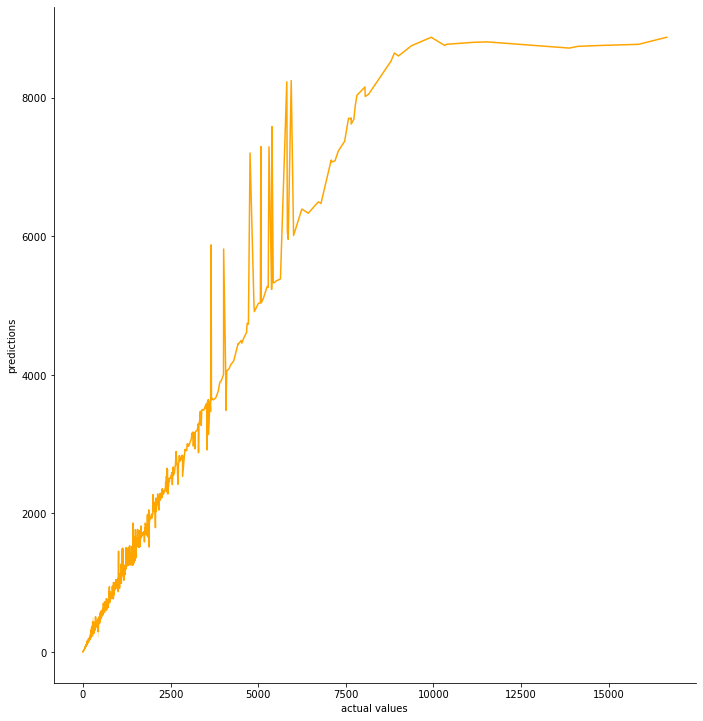

In [106]:
comp1 = sns.relplot(x="actual values", y="predictions",
             kind="line", data= pred1, color = "Orange")
comp1.fig.set_size_inches(11,11)

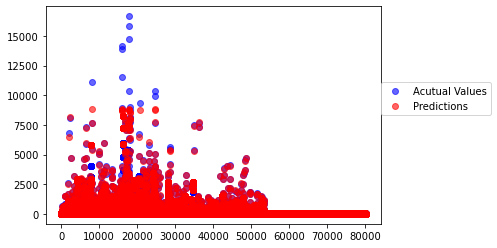

In [100]:
fig, ax = plt.subplots()
x = np.arange(0, len(pred), 1)
ax.scatter(x, pred["actual values"], c='b', label="Acutual Values",alpha = 0.6)
ax.scatter(x, pred["predictions"], c='r', label="Predictions",alpha = 0.6)
ax.legend(loc=(1, 0.5))

In [101]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
eval_set = [(X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:

def show_scores2(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, test_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, test_preds)}
    return scores

In [103]:
xgbst = show_scores2(xgb_model)
xgbst

{'Training MAE': 1.0376310923168652,
 'Valid MAE': 12.43019117282923,
 'Training R^2': 0.9995515332072136,
 'Valid R^2': 0.9218240129718673}

In [104]:
from sklearn.svm import LinearSVR
lSVR_model = LinearSVR()
lSVR_model.fit(X_train,y_train)

LinearSVR()

In [105]:
lsv = show_scores2(lSVR_model)
lsv

{'Training MAE': 6.431879420929584,
 'Valid MAE': 20.94172251851955,
 'Training R^2': 0.9567802425004495,
 'Valid R^2': 0.959011496977024}

In [106]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

las_model = Lasso()
las_model.fit(X_train, y_train)
lass = show_scores2(las_model)
lass

{'Training MAE': 6.557092747645304,
 'Valid MAE': 23.314597459543485,
 'Training R^2': 0.9603247402711714,
 'Valid R^2': 0.9606728953234681}

In [107]:
rdg_model = Ridge()
rdg_model.fit(X_train, y_train)
rid = show_scores2(rdg_model)
rid

{'Training MAE': 6.652148851544176,
 'Valid MAE': 23.1028022230212,
 'Training R^2': 0.9603473427754758,
 'Valid R^2': 0.9607318323897484}

In [108]:
enet_model = ElasticNet()
enet_model.fit(X_train, y_train)
ene = show_scores2(enet_model)
ene

{'Training MAE': 6.58569409806061,
 'Valid MAE': 23.289039578649877,
 'Training R^2': 0.9603383768575301,
 'Valid R^2': 0.9606926979806664}

In [109]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lin = show_scores2(lr_model)
lin

{'Training MAE': 6.652209722086446,
 'Valid MAE': 11440870430.575005,
 'Training R^2': 0.9603473417728949,
 'Valid R^2': -1709242226168836.5}

In [110]:
comparisson= pd.DataFrame(data={"Random Forest": randomf, 
                   "XGBoost": xgbst, "Linear SVR": lsv,"Lasso": lass, "Ridge": rid, "Elastic-Net": ene, "Linear Regression": lin })
comparisson

,Random Forest,XGBoost,Linear SVR,Lasso,Ridge,Elastic-Net,Linear Regression
Training MAE,0.053078,1.037631,6.431879,6.557093,6.652149,6.585694,6.652210e+00
Valid MAE,12.733284,12.430191,20.941723,23.314597,23.102802,23.289040,1.144087e+10
Training RMSLE,0.000212,NaN,NaN,NaN,NaN,NaN,NaN
Valid RMSLE,0.015254,NaN,NaN,NaN,NaN,NaN,NaN
Training R^2,0.999946,0.999552,0.956780,0.960325,0.960347,0.960338,9.603473e-01
Valid R^2,0.933601,0.921824,0.959011,0.960673,0.960732,0.960693,-1.709242e+15


From the values above it can be seen that RandomForrestRegressor has the best persormance.

In [116]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [121]:
rs_rf = RandomizedSearchCV(estimator=rf_model,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.6min
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.7min
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.4min
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.7min
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.5min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 4.7min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time= 5.1min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200;

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [125]:
rs_rf.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=500, n_jobs=1)

In [130]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
rs_rf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10}

In [127]:
#rs_y_preds = rs_rf.predict(X_test)
rs_rforest=show_scores(rs_rf)
rs_rforest

{'Training MAE': 1.2141866114512607,
 'Valid MAE': 12.633116064493448,
 'Training RMSLE': 0.012835832312916823,
 'Valid RMSLE': 0.016634689812147992,
 'Training R^2': 0.9991585319495869,
 'Valid R^2': 0.9424016618781974}

In [128]:
comparisson2 = pd.DataFrame(data={"Before": randomf, 
                   "After": rs_rforest })
comparisson2.head()

,Before,After
Training MAE,0.053078,1.214187
Valid MAE,12.733284,12.633116
Training RMSLE,0.000212,0.012836
Valid RMSLE,0.015254,0.016635
Training R^2,0.999946,0.999159


The previous version had a better performance.

<AxesSubplot:>

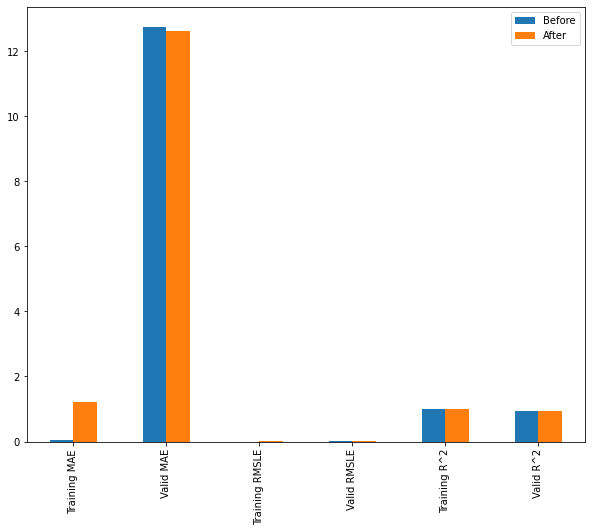

In [129]:
comparisson2.plot.bar(figsize=(10, 8))

In [ ]:
rs_best = rs_rf

### Featurer Importance

In [111]:
importances = rf_model.feature_importances_
feature_list = list(X_train.columns)
feature_importance= sorted(zip(importances, feature_list), reverse=True)
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])
df

,importance,feature
0,0.972916,Number of Mentions
1,0.013836,Condition Group
2,0.005617,Condition
3,0.004701,ICD10_codes
4,0.001907,State
5,0.000584,Age Group
6,0.000137,Start Month
7,0.000091,End Month
8,0.000064,Time Difference
9,0.000033,Group


Text(0.5, 1.0, 'Feature Importances')

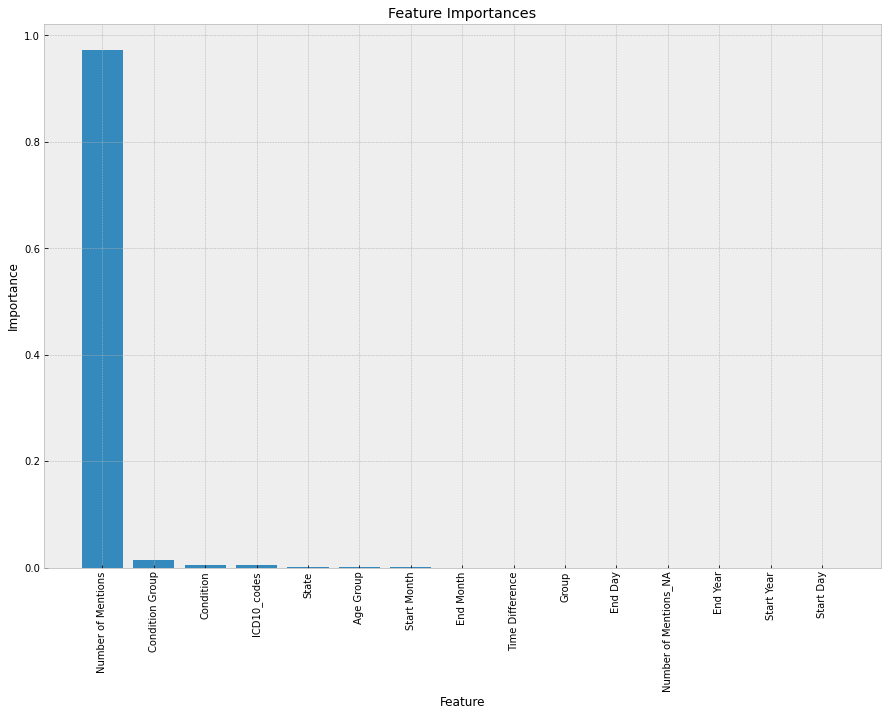

In [112]:
plt.style.use('bmh')
x_values = list(range(len(feature_importance)))
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
plt.xticks(x_values, feature, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

Number of Mentions column is leading to overfitting and will be removed.

In [107]:
X_train2 = X_train.copy()
X_test2 = X_test.copy()

In [108]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480816 entries, 31100 to 58156
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Group                  480816 non-null  int32  
 1   State                  480816 non-null  int32  
 2   Condition Group        480816 non-null  int32  
 3   Condition              480816 non-null  int32  
 4   ICD10_codes            480816 non-null  int32  
 5   Age Group              480816 non-null  int32  
 6   Number of Mentions     480816 non-null  float64
 7   Time Difference        480816 non-null  float64
 8   Start Year             480816 non-null  int64  
 9   Start Month            480816 non-null  int64  
 10  Start Day              480816 non-null  int64  
 11  End Year               480816 non-null  int64  
 12  End Month              480816 non-null  int64  
 13  End Day                480816 non-null  int64  
 14  Number of Mentions_NA  480816 non

In [109]:
X_train2.drop("Number of Mentions", inplace = True, axis = 1)

In [110]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480816 entries, 31100 to 58156
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Group                  480816 non-null  int32  
 1   State                  480816 non-null  int32  
 2   Condition Group        480816 non-null  int32  
 3   Condition              480816 non-null  int32  
 4   ICD10_codes            480816 non-null  int32  
 5   Age Group              480816 non-null  int32  
 6   Time Difference        480816 non-null  float64
 7   Start Year             480816 non-null  int64  
 8   Start Month            480816 non-null  int64  
 9   Start Day              480816 non-null  int64  
 10  End Year               480816 non-null  int64  
 11  End Month              480816 non-null  int64  
 12  End Day                480816 non-null  int64  
 13  Number of Mentions_NA  480816 non-null  int32  
dtypes: float64(1), int32(7), int64(6)

In [111]:
X_train2.drop(["Number of Mentions_NA"], inplace = True, axis = 1)

In [112]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480816 entries, 31100 to 58156
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Group            480816 non-null  int32  
 1   State            480816 non-null  int32  
 2   Condition Group  480816 non-null  int32  
 3   Condition        480816 non-null  int32  
 4   ICD10_codes      480816 non-null  int32  
 5   Age Group        480816 non-null  int32  
 6   Time Difference  480816 non-null  float64
 7   Start Year       480816 non-null  int64  
 8   Start Month      480816 non-null  int64  
 9   Start Day        480816 non-null  int64  
 10  End Year         480816 non-null  int64  
 11  End Month        480816 non-null  int64  
 12  End Day          480816 non-null  int64  
dtypes: float64(1), int32(6), int64(6)
memory usage: 40.4 MB


In [113]:
X_test2.drop(["Number of Mentions","Number of Mentions_NA"], inplace = True, axis = 1)

In [114]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80136 entries, 230 to 260783
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Group            80136 non-null  int32  
 1   State            80136 non-null  int32  
 2   Condition Group  80136 non-null  int32  
 3   Condition        80136 non-null  int32  
 4   ICD10_codes      80136 non-null  int32  
 5   Age Group        80136 non-null  int32  
 6   Time Difference  80136 non-null  float64
 7   Start Year       80136 non-null  int64  
 8   Start Month      80136 non-null  int64  
 9   Start Day        80136 non-null  int64  
 10  End Year         80136 non-null  int64  
 11  End Month        80136 non-null  int64  
 12  End Day          80136 non-null  int64  
dtypes: float64(1), int32(6), int64(6)
memory usage: 6.7 MB


In [115]:
rf2_model = RandomForestRegressor(n_jobs=1)
rf2_model.fit(X_train2, y_train)

RandomForestRegressor(n_jobs=1)

In [109]:
def show_scores3(model):
    train_preds = model.predict(X_train2)
    test_preds = model.predict(X_test2)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": mean_squared_log_error(y_train, train_preds),
              "Valid RMSLE": mean_squared_log_error(y_test, test_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, test_preds)}
    return scores

In [125]:
show_scores3(rf2_model)

{'Training MAE': 2.157534715536247,
 'Valid MAE': 56.982523188085906,
 'Training RMSLE': 0.284312107397631,
 'Valid RMSLE': 2.98661330049375,
 'Training R^2': 0.9878696961064762,
 'Valid R^2': 0.8084160783132569}

There is a drop in performance after reducing the extent of the overfitting.

In [126]:
importances = rf2_model.feature_importances_
feature_list = list(X_train2.columns)
feature_importance= sorted(zip(importances, feature_list), reverse=True)
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])
df

,importance,feature
0,0.522427,State
1,0.143994,Condition Group
2,0.131440,Age Group
3,0.051473,Time Difference
4,0.036566,ICD10_codes
5,0.035439,Condition
6,0.030404,Group
7,0.020111,End Month
8,0.018180,Start Month
9,0.003965,Start Year


Text(0.5, 1.0, 'Feature Importances')

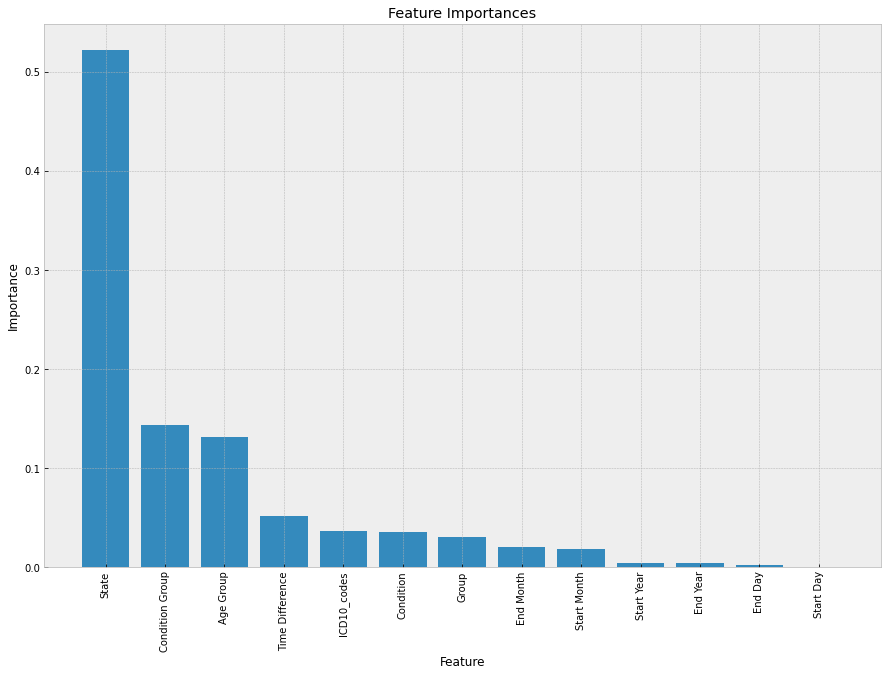

In [127]:
plt.style.use('bmh')
x_values = list(range(len(feature_importance)))
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
plt.xticks(x_values, feature, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

Better performance, hyperparameter tuning will be used to reduce overfitting.

In [116]:
train2_preds = rf2_model.predict(X_train2)
test2_preds = rf2_model.predict(X_test2)
pred2 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": test2_preds})
pred2.head()

,actual values,predictions
230,36.149426,25.684598
12361,0.000000,0.000000
12360,0.000000,0.361494
12357,36.149426,11.958391
8690,0.000000,0.000000


In [117]:
pred2.to_excel("Prediction2.xlsx")

This shows that the model relied heavily on the Number of Mentions column

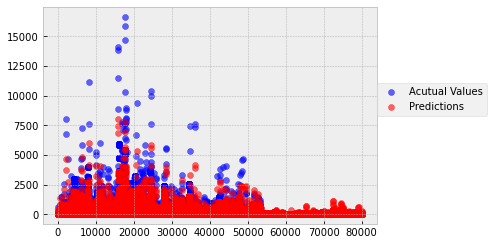

In [129]:
fig, ax = plt.subplots()
x = np.arange(0, len(pred), 1)
ax.scatter(x, pred["actual values"], c='b', label="Acutual Values",alpha = 0.6)
ax.scatter(x, pred["predictions"], c='r', label="Predictions",alpha = 0.6)
ax.legend(loc=(1, 0.5))

Hyperparameter tuning the new model to try and reduce overfitting.

In [169]:
rs2_rf = RandomizedSearchCV(estimator=rf2_model,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

rs2_rf.fit(X_train2, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=10.6min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time= 8.7min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time= 9.0min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time= 8.8min
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time= 8.3min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=1), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [171]:
rs2_rf.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [173]:
rs2_rforest=show_scores3(rs2_rf)
rs2_rforest

{'Training MAE': 30.64869250280428,
 'Valid MAE': 114.00706264411984,
 'Training RMSLE': 4.004959166730352,
 'Valid RMSLE': 4.857422763004729,
 'Training R^2': 0.37007829545032545,
 'Valid R^2': 0.22226894855936408}

In [174]:
rs2_rf.best_estimator_

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=6,
                      n_estimators=500, n_jobs=1)

In [177]:
comparisson3 = pd.DataFrame(data={"Before": show_scores3(rf2_model), 
                   "After": rs2_rforest })
comparisson3.head()

,Before,After
Training MAE,2.152569,30.648693
Valid MAE,56.832533,114.007063
Training RMSLE,0.282925,4.004959
Valid RMSLE,2.981834,4.857423
Training R^2,0.987943,0.370078


In [178]:
rf2_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [130]:
scaled_X_train2 = scaler.fit_transform(X_train2)
scaled_X_test2 = scaler.transform(X_test2)

In [121]:
rf3_model = RandomForestRegressor(n_jobs=1, n_estimators = 1200 )
rf3_model.fit(X_train2, y_train)

RandomForestRegressor(n_estimators=1200, n_jobs=1)

In [133]:
show_scores3(rf3_model)

{'Training MAE': 2.1415973869363683,
 'Valid MAE': 56.23985650595981,
 'Training RMSLE': 0.28180647435357786,
 'Valid RMSLE': 3.0018660369594237,
 'Training R^2': 0.9881204041531106,
 'Valid R^2': 0.8141325821737796}

In [122]:
train2_preds = rf3_model.predict(X_train2)
test2_preds = rf3_model.predict(X_test2)
pred3 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": test2_preds})
pred3

,actual values,predictions
230,36.149426,30.442731
12361,0.000000,0.000000
12360,0.000000,0.030125
12357,36.149426,14.769598
8690,0.000000,0.000000
...,...,...
56051,0.000000,9.915010
56051,0.000000,9.910968
56051,0.000000,9.941092
56051,0.000000,9.941092


In [125]:
pred3.to_excel("Prediction3.xlsx")

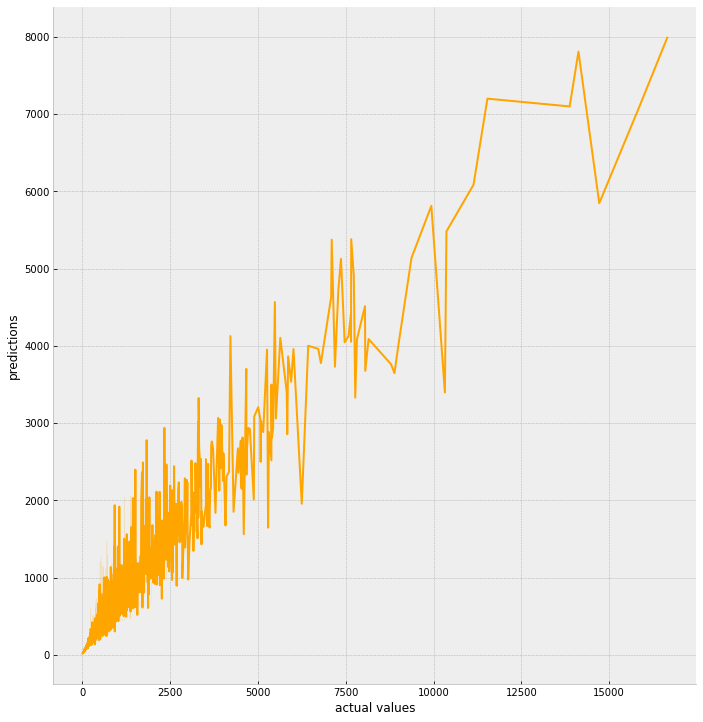

In [126]:
comp3 = sns.relplot(x="actual values", y="predictions",
             kind="line", data= pred3, color = "Orange")
comp3.fig.set_size_inches(11,11)

In [ ]:
rf3_model.fit(scaled_X_train2 , np.sqrt(y_train))

In [132]:
def show_scores4(model):
    train_preds = model.predict(scaled_X_train2)
    test_preds = model.predict(np.sqrt(X_test2))
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": mean_squared_log_error(y_train, train_preds),
              "Valid RMSLE": mean_squared_log_error(y_test, test_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_test, test_preds)}
    return scores

In [139]:
show_scores4(rf3_model)

{'Training MAE': 32.43996736317347,
 'Valid MAE': 134.13117809390363,
 'Training RMSLE': 1.8035945220650655,
 'Valid RMSLE': 6.449495219166238,
 'Training R^2': -0.009967965851723326,
 'Valid R^2': -0.0792651303645886}

Scaling caused a decrese in performance.

In [120]:
rf3_model.fit(X_train2, y_train)

NameError: name 'rf3_model' is not defined

In [141]:
importances = rf3_model.feature_importances_
feature_list = list(X_train2.columns)
feature_importance= sorted(zip(importances, feature_list), reverse=True)
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])
df

,importance,feature
0,0.523055,State
1,0.141732,Condition Group
2,0.131479,Age Group
3,0.047067,Time Difference
4,0.038504,Condition
5,0.035093,Group
6,0.034199,ICD10_codes
7,0.019282,End Month
8,0.019234,Start Month
9,0.004160,End Year


Text(0.5, 1.0, 'Feature Importances')

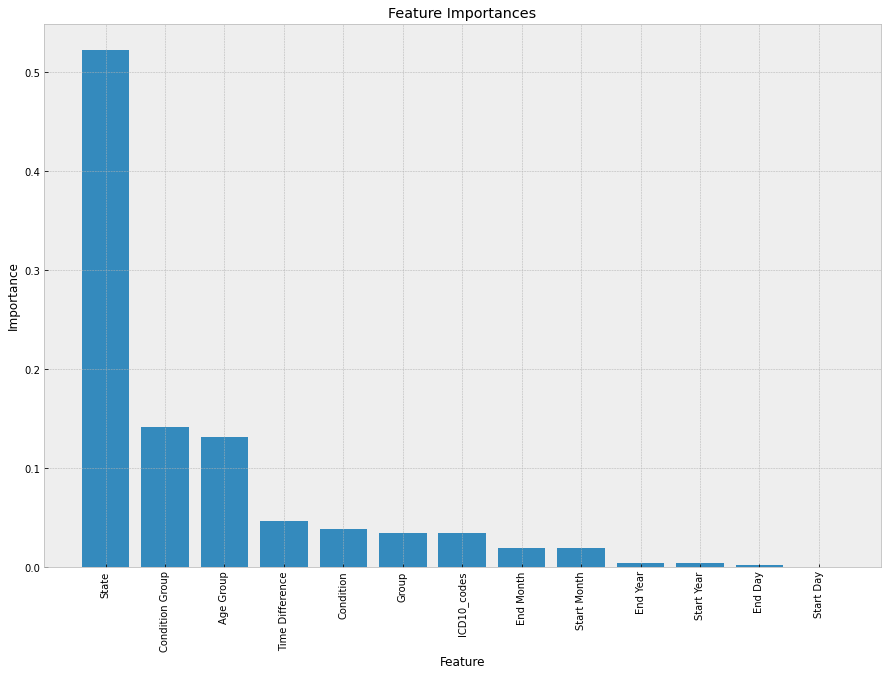

In [142]:
plt.style.use('bmh')
x_values = list(range(len(feature_importance)))
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
plt.xticks(x_values, feature, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

Increasing the number of estimators reduces overfitting. However, increasing min_impurity_split, min_samples_leaf and
min_samples_split leads to decrease in performance, as depicted by the decreasing r^2 score value.

Increasing the number of decision trees requires use of more processing resources and time. As a result, fitting the model
takes a lot of time

In [107]:
rf4_model = RandomForestRegressor(n_jobs=1, n_estimators = 1500 )
rf4_model.fit(X_train2, y_train)

RandomForestRegressor(n_estimators=1500, n_jobs=1)

In [111]:
show_scores3(rf4_model)

{'Training MAE': 2.1407291405592774,
 'Valid MAE': 56.260245638778734,
 'Training RMSLE': 0.28181470895374305,
 'Valid RMSLE': 3.0005071817249,
 'Training R^2': 0.988181765329979,
 'Valid R^2': 0.813856537747826}

In [113]:
train2_preds = rf4_model.predict(X_train2)
test2_preds = rf4_model.predict(X_test2)
pred = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": test2_preds})
pred

,actual values,predictions
230,36.149426,30.591955
12361,0.000000,0.013333
12360,0.000000,0.024100
12357,36.149426,12.371671
8690,0.000000,0.000000
...,...,...
56051,0.000000,9.549916
56051,0.000000,9.577249
56051,0.000000,9.546682
56051,0.000000,9.463219


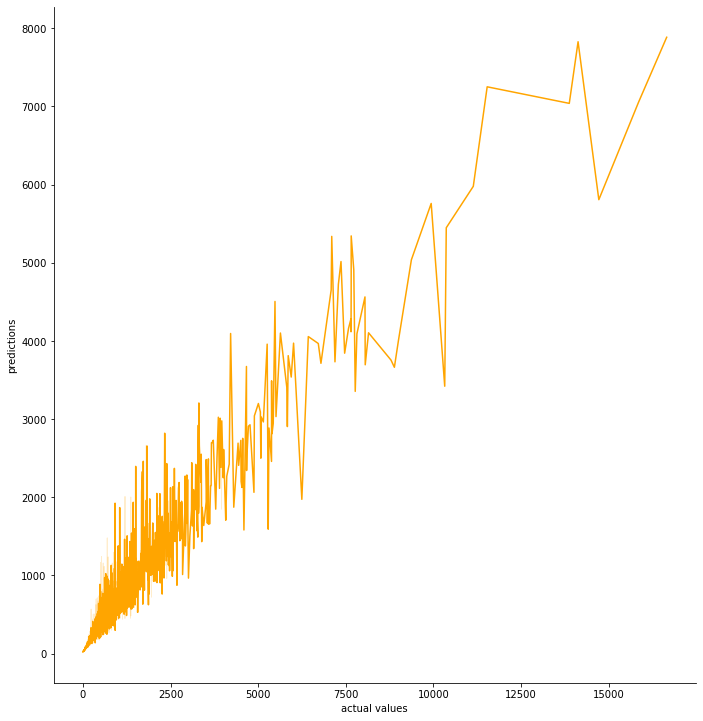

In [115]:
comp = sns.relplot(x="actual values", y="predictions",
             kind="line", data= pred, color = "Orange")
comp.fig.set_size_inches(11,11)

In [114]:
pred.to_excel("predictions.xlsx")  

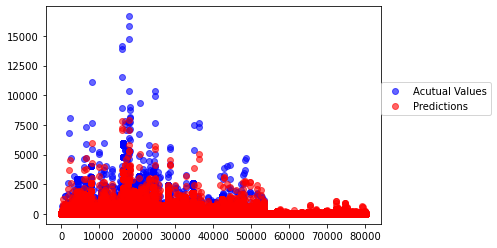

In [116]:
fig, ax = plt.subplots()
x = np.arange(0, len(pred), 1)
ax.scatter(x, pred["actual values"], c='b', label="Acutual Values",alpha = 0.6)
ax.scatter(x, pred["predictions"], c='r', label="Predictions",alpha = 0.6)
ax.legend(loc=(1, 0.5))

Reducing overfitting has led to poorer performance

In [117]:
importances = rf4_model.feature_importances_
feature_list = list(X_train2.columns)
feature_importance= sorted(zip(importances, feature_list), reverse=True)
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

Text(0.5, 1.0, 'Feature Importances')

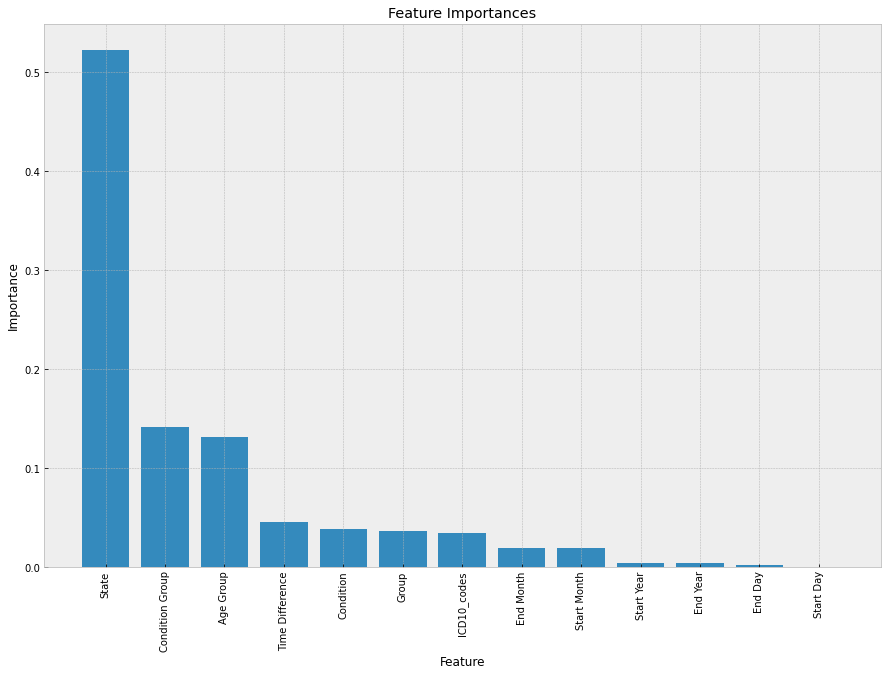

In [118]:
plt.style.use('bmh')
x_values = list(range(len(feature_importance)))
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
plt.xticks(x_values, feature, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

Increasing the number of decision trees to 1500 has increased overfitting.

In [124]:
result1 = pd.read_excel("Prediction1.xlsx", index_col = "Unnamed: 0")
result1.head()

,actual values,predictions
230,36.149426,36.149426
12361,0.000000,0.000000
12360,0.000000,0.000000
12357,36.149426,36.149426
8690,0.000000,0.000000


The first model was only learning from the  Number of Mentions column. However, it has the most accurate predictions.

In [125]:
result2 = pd.read_excel("Prediction2.xlsx", index_col = "Unnamed: 0")
result2.head()

,actual values,predictions
230,36.149426,25.684598
12361,0.000000,0.000000
12360,0.000000,0.361494
12357,36.149426,11.958391
8690,0.000000,0.000000


The second model didn't learn from the Number of Mentions column. Though the overfitting reduced,
predictions as well as performance declined. It had 100 decision trees.

In [126]:
result3 = pd.read_excel("Prediction3.xlsx", index_col = "Unnamed: 0")
result3.head()

,actual values,predictions
230,36.149426,30.442731
12361,0.000000,0.000000
12360,0.000000,0.030125
12357,36.149426,14.769598
8690,0.000000,0.000000


The third model had 1200 decision trees. This slightly improved the performance as well as overfitting. However, the predictions became less accurate.

In [128]:
result4 = pd.read_excel("predictions.xlsx", index_col = "Unnamed: 0")
result4.head()

,actual values,predictions
230,36.149426,30.591955
12361,0.000000,0.013333
12360,0.000000,0.024100
12357,36.149426,12.371671
8690,0.000000,0.000000


The final model had 1500 decision trees, which improved on the third's performance. However, overfitting as well as prediction inaccuracy incread.